<a href="https://colab.research.google.com/github/Poonama30N/News-Comparison-Analysis/blob/main/New_Comparison_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Comparison Analysis of NewYork Times 


##**1. Web scraping**

**1.1. Importing required libraries**

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from wordcloud import WordCloud

**1.2. Creating a new CSV file**

In [ ]:
data_file = open('news.csv','w')
data_writer = csv.writer(data_file)
data_writer.writerow(['ID','Date','Title','Category','Author','Link'])

36

**1.3. Generating required URLs for collecting data**

In [ ]:
url1 ='https://www.nytimes.com/issue/todaysheadlines/2019/12/'
url2 = 'https://www.nytimes.com/issue/todaysheadlines/2020/12/'
links=[]
index=['01','02','03','04','05','06','07','08','09','10','11','12','13','14']

for i in index:
  links.append('2019/12/'+i)
  links.append(url1+i+'/todays-headlines')
  links.append('2020/12/'+i)
  links.append(url2+i+'/todays-headlines')

it = iter(links)
links = dict(zip(it,it))

**1.4. Appling BeautifulSoup for web scraping**

In [ ]:
id=1
for d,p in links.items():
  source = requests.get(p).text
  soup= BeautifulSoup(source,'lxml')

  for i in soup.find_all('section',class_='css-1l4i545 ebkl1p30'):
    category=i.find('a')['name']
    sub_section = i.find('ol',class_='css-1ncf02q')
    for j in sub_section.find_all('li',class_='css-i435f0'):
      link='https://www.nytimes.com/'+j.find('a')['href']
      title=j.find('h2').text
      if j.find('span',class_='css-1n7hynb'):
        author= j.find('span',class_='css-1n7hynb').text
      else:
        author = None
      data_writer.writerow([id,d,title,category,author,link])
      id+=1
data_file.close()

##**2. Understanding Data**

**2.1. Reading CSV file**

In [ ]:
data= pd.read_csv('news.csv')
print(data.shape)
data.head(10)

(1202, 6)


,ID,Date,Title,Category,Author,Link
0,1,2019/12/01,Trump’s Intervention in SEALs Case Tests Penta...,topnews,"Dave Philipps, Peter Baker, Maggie Haberman an...",https://www.nytimes.com//2019/11/30/us/politic...
1,2,2019/12/01,Prime Mover: How Amazon Wove Itself Into the L...,topnews,Scott Shane,https://www.nytimes.com//2019/11/30/business/a...
2,3,2019/12/01,"Jeffrey Epstein, Blackmail and a Lucrative ‘Ho...",topnews,"Jessica Silver-Greenberg, Emily Steel, Jacob B...",https://www.nytimes.com//2019/11/30/business/d...
3,4,2019/12/01,Latin Dictionary’s Journey: A to Zythum in 125...,editors'picks,Annalisa Quinn,https://www.nytimes.com//2019/11/30/arts/latin...
4,5,2019/12/01,A Better Internet Is Waiting for Us,editors'picks,Annalee Newitz,https://www.nytimes.com//interactive/2019/11/3...
5,6,2019/12/01,Students Fainting From Hunger in Venezuela’s F...,world,Anatoly Kurmanaev and Isayen Herrera,https://www.nytimes.com//2019/11/30/world/amer...
6,7,2019/12/01,The Lonely and Dangerous Life of the Filipino ...,world,Aurora Almendral and Jes Aznar,https://www.nytimes.com//2019/11/30/world/asia...
7,8,2019/12/01,Brazil’s Leader Falsely Blames Leonardo DiCapr...,world,Reuters,https://www.nytimes.com//2019/11/30/world/amer...
8,9,2019/12/01,Winter Storm Expected to Disrupt Travel Starti...,u.s.,Alex Traub and Johnny Diaz,https://www.nytimes.com//2019/11/30/us/weekend...
9,10,2019/12/01,A Census Whodunit: Why Was the Citizenship Que...,u.s.,Michael Wines,https://www.nytimes.com//2019/11/30/us/census-...


In [ ]:
data.isnull().sum()

ID          0
Date        0
Title       0
Category    0
Author      3
Link        0
dtype: int64

**2.2. Extracting year, month, day nd their name from the date column**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = data['Date'].dt.month_name()
data['month-year'] = data['month'].map(str) +'-'+ data['year'].map(int).map(str)
data['day name'] = data['Date'].dt.day_name()
data['day'] = pd.DatetimeIndex(data['Date']).day
#data= data.sort_values(by='Date')
data.shape
data.head()

,ID,Date,Title,Category,Author,Link,year,month,month-year,day name,day
0,1,2019-12-01,Trump’s Intervention in SEALs Case Tests Penta...,topnews,"Dave Philipps, Peter Baker, Maggie Haberman an...",https://www.nytimes.com//2019/11/30/us/politic...,2019,December,December-2019,Sunday,1
1,2,2019-12-01,Prime Mover: How Amazon Wove Itself Into the L...,topnews,Scott Shane,https://www.nytimes.com//2019/11/30/business/a...,2019,December,December-2019,Sunday,1
2,3,2019-12-01,"Jeffrey Epstein, Blackmail and a Lucrative ‘Ho...",topnews,"Jessica Silver-Greenberg, Emily Steel, Jacob B...",https://www.nytimes.com//2019/11/30/business/d...,2019,December,December-2019,Sunday,1
3,4,2019-12-01,Latin Dictionary’s Journey: A to Zythum in 125...,editors'picks,Annalisa Quinn,https://www.nytimes.com//2019/11/30/arts/latin...,2019,December,December-2019,Sunday,1
4,5,2019-12-01,A Better Internet Is Waiting for Us,editors'picks,Annalee Newitz,https://www.nytimes.com//interactive/2019/11/3...,2019,December,December-2019,Sunday,1


###**3. Exploratory Data Analysis**

**3.1. Comparing the Number of articles published during the first two weeks of December 2019 and December 2020.**

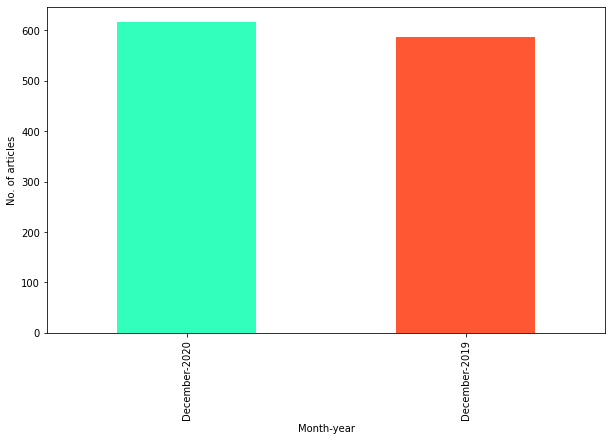

In [ ]:
colors = ['#33FFBD','#FF5733','#33FF57','#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
plt.figure(figsize=(10,6))
plt.xlabel("Month-year")
plt.ylabel("No. of articles")
#plt.subplot(1,2,1)
data['month-year'].value_counts().plot(kind='bar',color=colors)


**3.2. Comparing the number of articles published each day for the whole timespan**

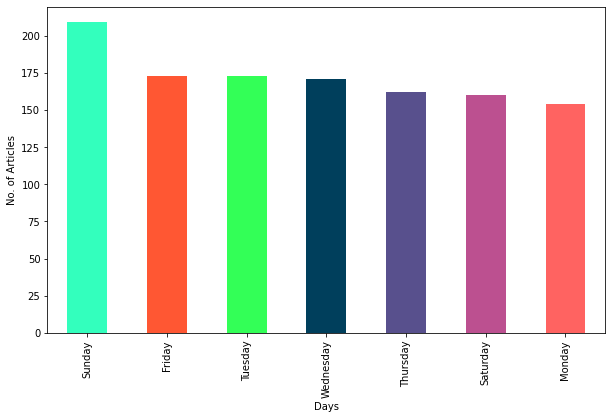

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel("Days")
plt.ylabel("No. of Articles")
#plt.subplot(1,2,2)
data['day name'].value_counts().plot(kind='bar',color=colors)

**3.3. Comparing the number of articles published in week one and week two between December 2019 and December 2020**

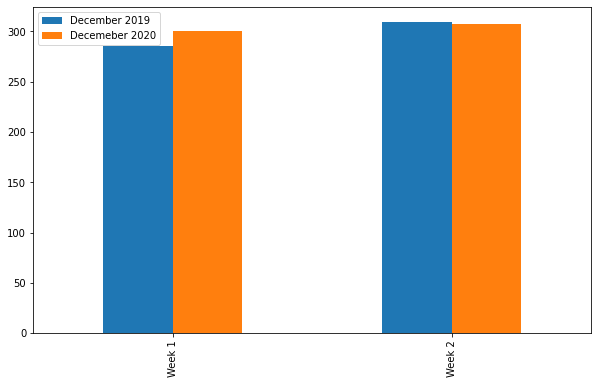

In [ ]:
week1_2019=len(data[(data['year']==2019) & (data['day']<8)])
week2_2019=len(data[(data['year']==2019) & (data['day']>7)])
week1_2020=len(data[(data['year']==2020) & (data['day']<8)])
week2_2020=len(data[(data['year']==2020) & (data['day']>7)])

df = pd.DataFrame({
    "December 2019" : [week1_2019,week1_2020],
    "Decemeber 2020" : [week2_2019,week2_2020]},
    index = ['Week 1','Week 2'])

df.plot(kind='bar',figsize=(10,6))

**3.4.Visualising the popularity of the Authors (top 20 and bottom 20)**

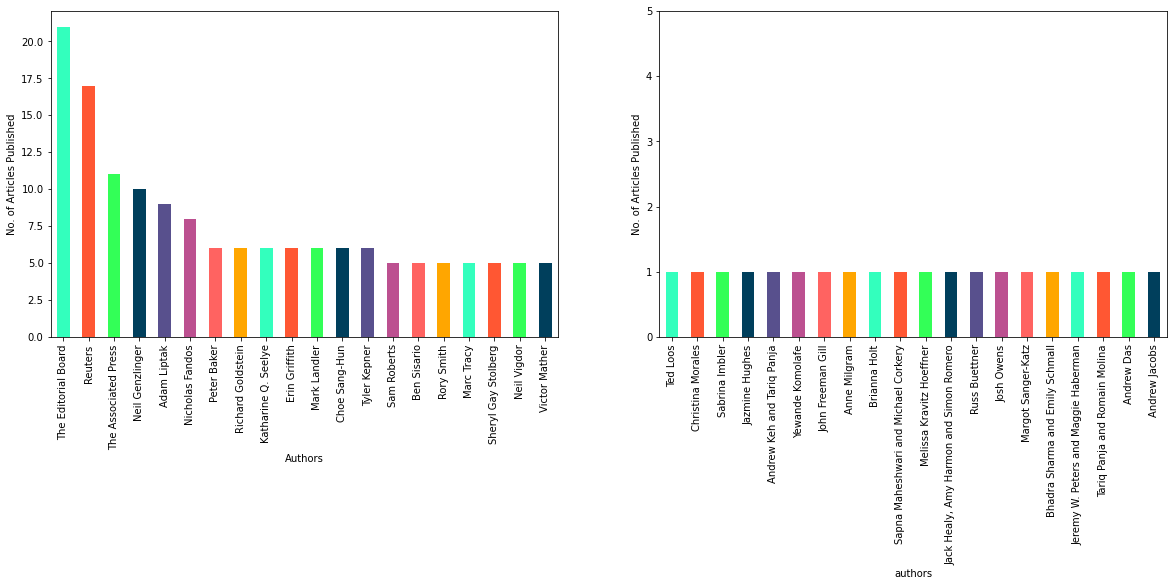

In [ ]:
#popular author
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data['Author'].value_counts().head(20).plot(kind='bar',color=colors)
plt.ylabel("No. of Articles Published")
plt.xlabel("Authors")
plt.subplot(1,2,2)
scale_factor = 5
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
data['Author'].value_counts().tail(20).plot(kind='bar',color=colors)
plt.ylabel("No. of Articles Published")
plt.xlabel("authors")
plt.show()

##**4. Comparison analysis study of categories of news articles**

**4.1. Comparing the number of articles in each category for the whole timespan**

Text(0.5, 0, 'Categories')

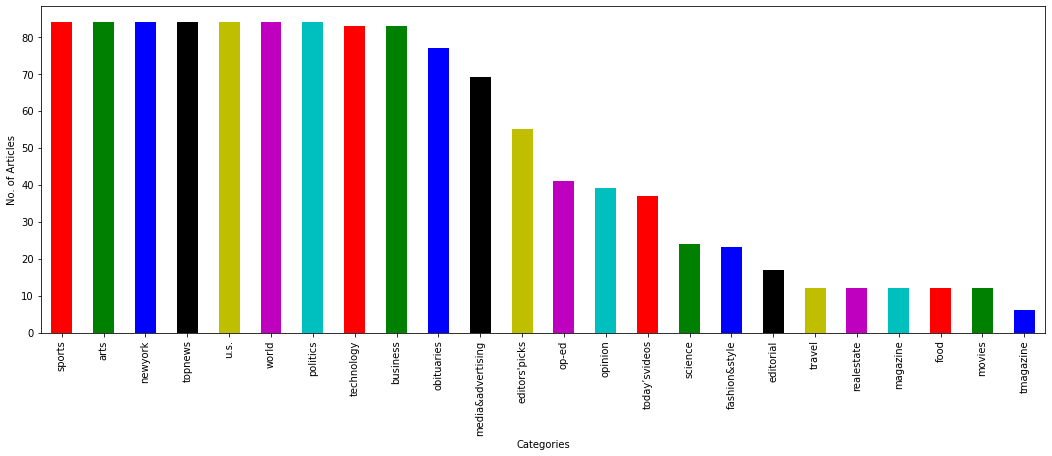

In [ ]:
#popular category
plt.figure(figsize=(18,6))
data['Category'].value_counts().plot(kind='bar',color=list('rgbkymc'))
plt.ylabel("No. of Articles")
plt.xlabel("Categories")


**4.2. Comparing the number of articles in each category between December 2019 and December 2020**

<Figure size 1296x432 with 0 Axes>

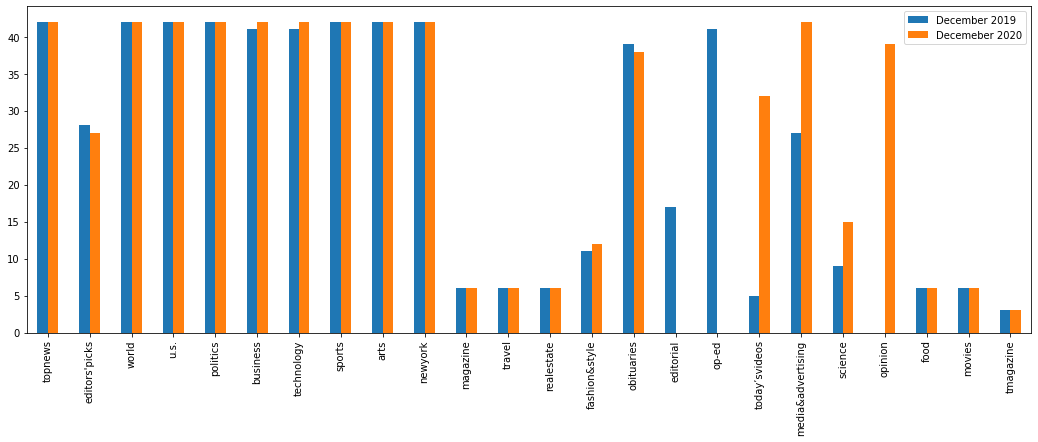

In [ ]:
cat =data['Category'].unique()
cat_2019 = list(data.Category[data.year==2019])
cat_2020 = list(data.Category[data.year==2020])
freq1 = []
freq2 = []

for i in cat:
  freq1.append(cat_2019.count(i))
  freq2.append(cat_2020.count(i))

plotting = pd.DataFrame({
    "December 2019" : freq1,
    "Decemeber 2020" : freq2},
    index = cat)
plt.figure(figsize=(18,6))
plotting.plot(kind='bar',figsize=(18,6))


**4.3. Visualising the most popular word used in the Top news of year 2019**

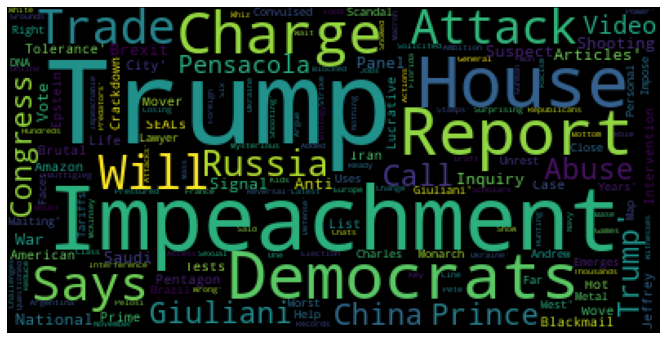

In [ ]:

text = data.loc[(data['Category']=='topnews')&(data['year']==2019)]

wordcloud = WordCloud().generate(str(text['Title'].values))
plt.figure(figsize=(18,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**4.4. Visualising the most popular word used in the Top news of year 2020**

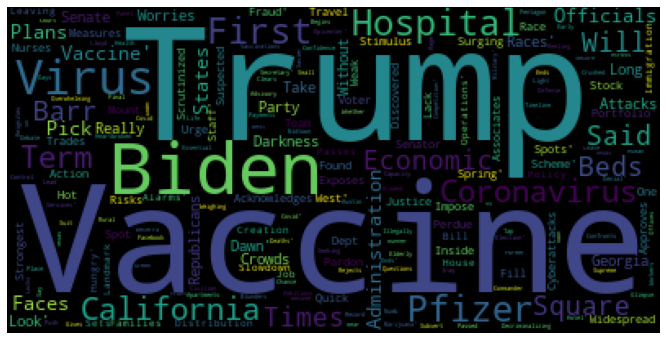

In [ ]:

text = data.loc[(data['Category']=='topnews')&(data['year']==2020)]

wordcloud = WordCloud().generate(str(text['Title'].values))
plt.figure(figsize=(18,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##**5. User Interaction**

In [ ]:

print("Enter the topic name : ")
topic = input()
df = data[data['Title'].str.contains(topic,case=False) | data['Category'].str.contains(topic,case=False)]

if df.empty:
  print('No such topic found. Please search another topic')
else: 
  pd.set_option('display.max_rows', None)
  pd.set_option('display.max_colwidth',1)
  print(df[['ID','Title']])
  print()
  print("Please enter the ID of the news article you would like to choose : ")
  id = int(input())
  print(data.Link[data.ID==id])




Enter the topic name : 
corona
        ID                                                                             Title
61    62    Scott Atlas, a Trump Coronavirus Adviser, Resigns                               
66    67    Moderna Applies for Emergency F.D.A. Approval for Its Coronavirus Vaccine       
135   136   Coronavirus Vaccine Could Be Ready in a Few Weeks, Says Johnson                 
214   215   U.K. Approves Pfizer Coronavirus Vaccine, a First in the West                   
302   303   Protest Over Staten Island Coronavirus Restrictions                             
380   381   ‘There Is Momentum,’ Pelosi Says of Coronavirus Relief Deal                     
396   397   Spit in a Tube and Mail It In: A New Frontier in Coronavirus Testing            
465   466   The Elderly vs. Essential Workers: Who Should Get the Coronavirus Vaccine First?
663   664   Most of California Locks Down Again as Coronavirus Strains Hospitals            
674   675   Coronavirus Apps Show Promi